In [126]:

import numpy as np 
import pandas as pd
import seaborn as sns 



In [127]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# warning library

import warnings
warnings.filterwarnings('ignore')


In [128]:
# data import

data = pd.read_csv("breast-cancer.csv")


data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)


In [129]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [130]:
data= data.drop(['id'], axis=1)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [132]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [133]:
#check jika ada missing value
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [134]:
data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [135]:
data.values

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [136]:
data.shape

(569, 31)

In [137]:
#target distribusi
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


Number of Malignant : 212
Number of Benign    : 357


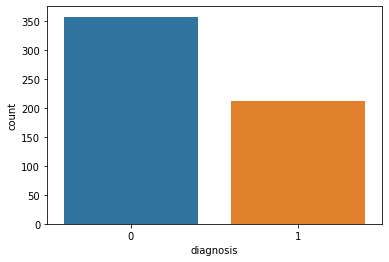

In [138]:
# Target feature:
print("Number of Malignant :", data['diagnosis'].value_counts()[1])
print("Number of Benign    :", data['diagnosis'].value_counts()[0])

# Visualization:
sns.countplot(data['diagnosis'])
plt.show()

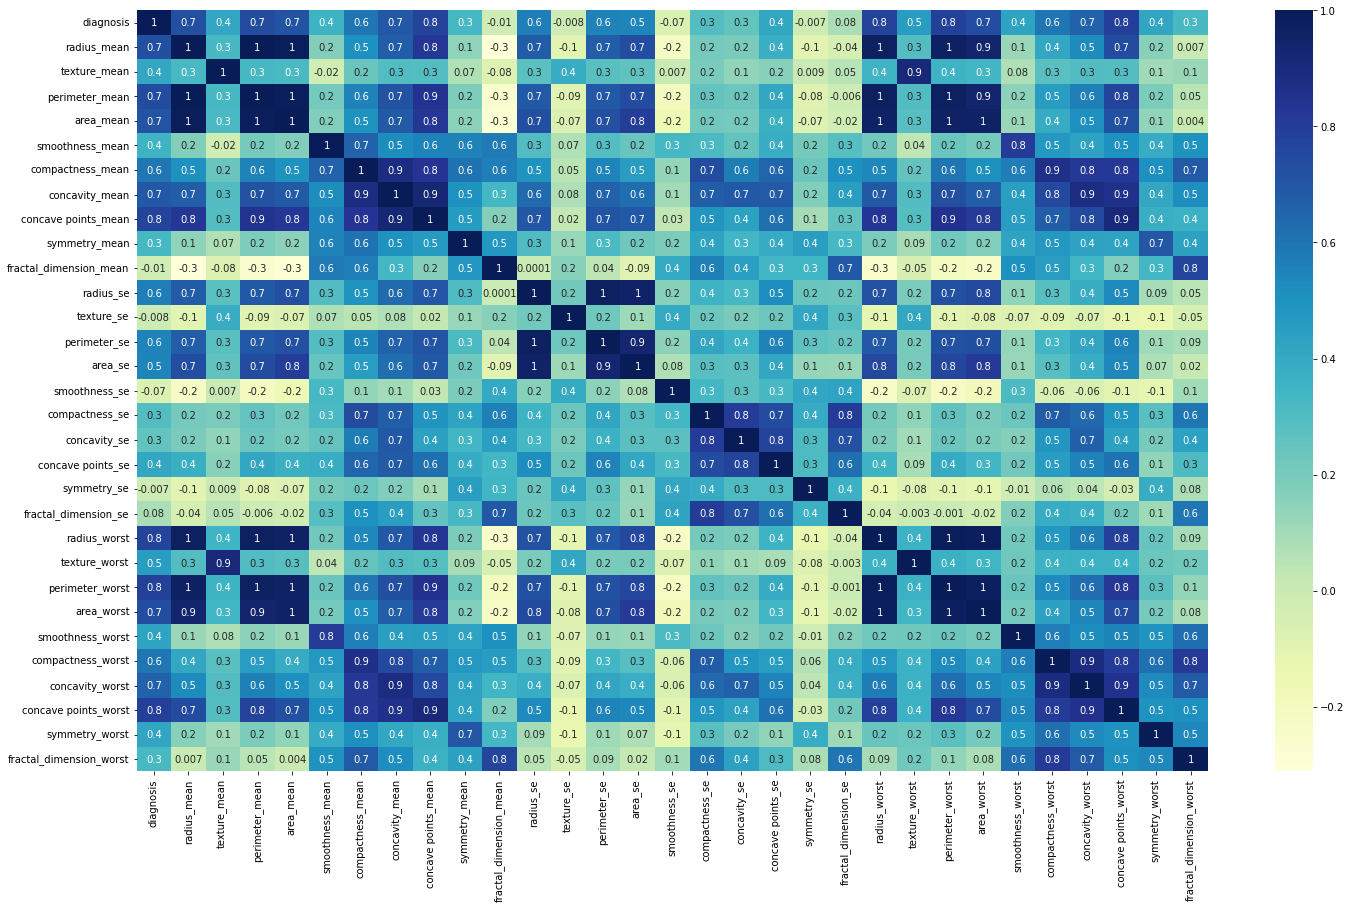

In [139]:
# Correlation using Heatmap:
plt.figure(figsize=(24,14))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap='YlGnBu')
plt.show()

In [140]:
# sns.pairplot(data)

In [141]:
# Splitting Independent and Dependent Feature:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]


In [142]:
# find and remove correlated features
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# Setting threshold value if greater than 0.7 means multicollinearity between independent features is high and we have to remove that features:
correlation(data, 0.7)

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [143]:
# Number of highly correlated features:
len(correlation(data, 0.7))

21

In [144]:
# Listing out highly correlated features:
correlated_features = list(correlation(data, 0.7))

In [145]:
# Dropping highly correlated features:
X = X.drop(correlated_features, axis=1)
X.head()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364


In [146]:
X.tail()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
564,22.39,0.11100,0.11590,0.1726,0.05623,1.256,0.010300,0.01114,0.2060
565,28.25,0.09780,0.10340,0.1752,0.05533,2.463,0.005769,0.01898,0.2572
566,28.08,0.08455,0.10230,0.1590,0.05648,1.075,0.005903,0.01318,0.2218
567,29.33,0.11780,0.27700,0.2397,0.07016,1.595,0.006522,0.02324,0.4087
568,24.54,0.05263,0.04362,0.1587,0.05884,1.428,0.007189,0.02676,0.2871


In [147]:
X.describe()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,0.096360,0.104341,0.181162,0.062798,1.216853,0.007041,0.020542,0.290076
std,4.301036,0.014064,0.052813,0.027414,0.007060,0.551648,0.003003,0.008266,0.061867
min,9.710000,0.052630,0.019380,0.106000,0.049960,0.360200,0.001713,0.007882,0.156500
25%,16.170000,0.086370,0.064920,0.161900,0.057700,0.833900,0.005169,0.015160,0.250400
50%,18.840000,0.095870,0.092630,0.179200,0.061540,1.108000,0.006380,0.018730,0.282200
75%,21.800000,0.105300,0.130400,0.195700,0.066120,1.474000,0.008146,0.023480,0.317900
max,39.280000,0.163400,0.345400,0.304000,0.097440,4.885000,0.031130,0.078950,0.663800


In [148]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [149]:
print(X_train.shape)
print(X_test.shape)

(455, 9)
(114, 9)


In [150]:
# #standardization

# x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))


In [151]:
# # %% Train test split

# n_estimators = 10  #agac sayısı
# random_state = 42

# test_size = 0.3  # %30 test  %70 train
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)


In [152]:
# %% KNN
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train, y_train)

y_pred_test_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)
    
cm_test_knn = confusion_matrix(y_test, y_pred_test_knn)
cm_train_knn = confusion_matrix(y_train, y_pred_train_knn)
    
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)
acc_train_knn = accuracy_score(y_train, y_pred_train_knn)

print("KNN Test Score: {}, KNN Train Score: {}".format(acc_test_knn, acc_train_knn))

print("KNN CM Test: ",cm_test_knn)
print("KNN CM Train: ",cm_train_knn)

print()

KNN Test Score: 0.7280701754385965, KNN Train Score: 0.7714285714285715
KNN CM Test:  [[52 15]
 [16 31]]
KNN CM Train:  [[242  48]
 [ 56 109]]



In [153]:
cm = confusion_matrix(y_test, y_pred_test_knn)
cm

array([[52, 15],
       [16, 31]], dtype=int64)

<AxesSubplot:>

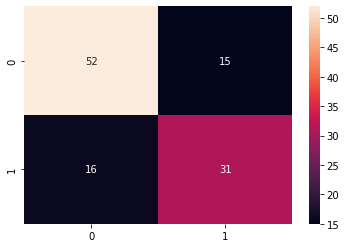

In [154]:
sns.heatmap(cm, annot=True)

In [155]:
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        67
           1       0.67      0.66      0.67        47

    accuracy                           0.73       114
   macro avg       0.72      0.72      0.72       114
weighted avg       0.73      0.73      0.73       114



In [156]:
print("accuracy : ", knn.score(X_test,y_test))

accuracy :  0.7280701754385965


In [159]:
import pickle
Pkl_Filename = "knn4.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

In [160]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_knn_Model = pickle.load(file)
Pickled_knn_Model

KNeighborsClassifier(n_neighbors=27)